In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import reg_helper as RHelper
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
folder = 'data/'
X = np.load(folder+'X_all.npy')
y = np.load(folder+'y_all.npy').reshape(-1)

In [3]:
from lightgbm import LGBMClassifier

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
# Armo indices de train, val
N_train = len(X)//2
cv_s = [(np.arange(N_train), np.arange(N_train, 2*N_train))]

In [23]:
cv_s

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58]),
  array([ 59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
          72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
          85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
         111, 112, 113, 114, 115, 116, 117]))]

In [37]:
X_train = X[cv_s[0][0]]
y_train = y[cv_s[0][0]]
X_val = X[cv_s[0][1]]
y_val = y[cv_s[0][1]]

In [38]:
parameters = {
    'max_depth': np.arange(1, 31, 4),
    'learning_rate': np.logspace(-6, -1, 5),
    'reg_lambda': np.logspace(-8, -3, 5),
    'min_child_samples': np.arange(1, 20, 4),
    'min_child_weight': np.logspace(-8, -1, 5)
}

prod = 1
for k, v in parameters.items():
    prod = prod * len(v)
    print(len(v))
n_estimators = 2000
print('Cantidad de iteraciones', prod)

8
5
5
5
5
Cantidad de iteraciones 5000


In [27]:
model = LGBMClassifier(n_estimators=n_estimators)
clf = GridSearchCV(model, parameters, n_jobs=-1, verbose=1, cv=cv_s)
clf.fit(X, y, early_stopping_rounds=100, eval_set=(X_val, y_val), verbose=0)

Fitting 1 folds for each of 5000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3215 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.7min finished


GridSearchCV(cv=[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58]),
                  array([ 59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 10...
                         'max_depth': array([ 1,  5,  9, 13, 17, 21, 25, 29]),
                         'min_child_samples': array([ 1,  5,  9, 13, 17]),
                         'min_child_weight': array([1.00000000e-08, 5.62341325e-07, 3.16227766e-05, 1.77827941e-03,
       1.00000000e-01]),
                         'reg_lambda': array([1.00000000e-08, 1.77827941e-07, 3.16227766e-06, 5.62341325e-05,
       1.00000000e-03])}

In [28]:
clf.best_params_

{'learning_rate': 0.00031622776601683794,
 'max_depth': 5,
 'min_child_samples': 1,
 'min_child_weight': 1e-08,
 'reg_lambda': 1e-08}

In [40]:
clf.best_score_

0.7627118644067796

In [44]:
clf.best_estimator_.score(X_train, y_train)

0.847457627118644

In [30]:
model = LGBMClassifier(n_estimators=n_estimators, **clf.best_params_)
model.fit(X_train, y_train, early_stopping_rounds=100, verbose=100, eval_set=(X_val, y_val))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.70427
[200]	valid_0's binary_logloss: 0.691176
[300]	valid_0's binary_logloss: 0.679041
[400]	valid_0's binary_logloss: 0.667777
[500]	valid_0's binary_logloss: 0.656973
[600]	valid_0's binary_logloss: 0.646826
[700]	valid_0's binary_logloss: 0.637324
[800]	valid_0's binary_logloss: 0.628106
[900]	valid_0's binary_logloss: 0.61904
[1000]	valid_0's binary_logloss: 0.610473
[1100]	valid_0's binary_logloss: 0.602387
[1200]	valid_0's binary_logloss: 0.594754
[1300]	valid_0's binary_logloss: 0.587637
[1400]	valid_0's binary_logloss: 0.580897
[1500]	valid_0's binary_logloss: 0.574527
[1600]	valid_0's binary_logloss: 0.568504
[1700]	valid_0's binary_logloss: 0.562798
[1800]	valid_0's binary_logloss: 0.557303
[1900]	valid_0's binary_logloss: 0.551928
[2000]	valid_0's binary_logloss: 0.546835
Did not meet early stopping. Best iteration is:
[2000]	valid_0's binary_logloss: 0.546835


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.00031622776601683794,
               max_depth=5, min_child_samples=1, min_child_weight=1e-08,
               min_split_gain=0.0, n_estimators=2000, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0,
               reg_lambda=1e-08, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [31]:
model.score(X[cv_s[0][1]], y[cv_s[0][1]])

0.7627118644067796

In [50]:
results_df = pd.DataFrame(clf.cv_results_)
results_df.drop(columns=['std_fit_time', 'mean_score_time', 'std_score_time', 'params', 
                         'std_test_score']).sort_values('rank_test_score').head(10)

,mean_fit_time,param_learning_rate,param_max_depth,param_min_child_samples,param_min_child_weight,param_reg_lambda,split0_test_score,mean_test_score,rank_test_score
4011,0.033719,0.1,1,1,3.16228e-05,1.77828e-07,0.762712,0.762712,1
2532,0.369962,0.000316228,17,5,5.62341e-07,3.16228e-06,0.762712,0.762712,1
2533,0.388131,0.000316228,17,5,5.62341e-07,5.62341e-05,0.762712,0.762712,1
2534,0.433935,0.000316228,17,5,5.62341e-07,0.001,0.762712,0.762712,1
2535,0.453013,0.000316228,17,5,3.16228e-05,1e-08,0.762712,0.762712,1
2536,0.378816,0.000316228,17,5,3.16228e-05,1.77828e-07,0.762712,0.762712,1
2537,0.465548,0.000316228,17,5,3.16228e-05,3.16228e-06,0.762712,0.762712,1
2531,0.390456,0.000316228,17,5,5.62341e-07,1.77828e-07,0.762712,0.762712,1
2538,0.378509,0.000316228,17,5,3.16228e-05,5.62341e-05,0.762712,0.762712,1
2540,0.373358,0.000316228,17,5,0.00177828,1e-08,0.762712,0.762712,1


,mean_fit_time,param_learning_rate,param_max_depth,param_min_child_samples,param_min_child_weight,param_reg_lambda,split0_test_score,mean_test_score,rank_test_score
4011,0.033719,0.1,1,1,3.16228e-05,1.77828e-07,0.762712,0.762712,1
2532,0.369962,0.000316228,17,5,5.62341e-07,3.16228e-06,0.762712,0.762712,1
2533,0.388131,0.000316228,17,5,5.62341e-07,5.62341e-05,0.762712,0.762712,1
2534,0.433935,0.000316228,17,5,5.62341e-07,0.001,0.762712,0.762712,1
2535,0.453013,0.000316228,17,5,3.16228e-05,1e-08,0.762712,0.762712,1
2536,0.378816,0.000316228,17,5,3.16228e-05,1.77828e-07,0.762712,0.762712,1
2537,0.465548,0.000316228,17,5,3.16228e-05,3.16228e-06,0.762712,0.762712,1
2531,0.390456,0.000316228,17,5,5.62341e-07,1.77828e-07,0.762712,0.762712,1
2538,0.378509,0.000316228,17,5,3.16228e-05,5.62341e-05,0.762712,0.762712,1
2540,0.373358,0.000316228,17,5,0.00177828,1e-08,0.762712,0.762712,1


1358


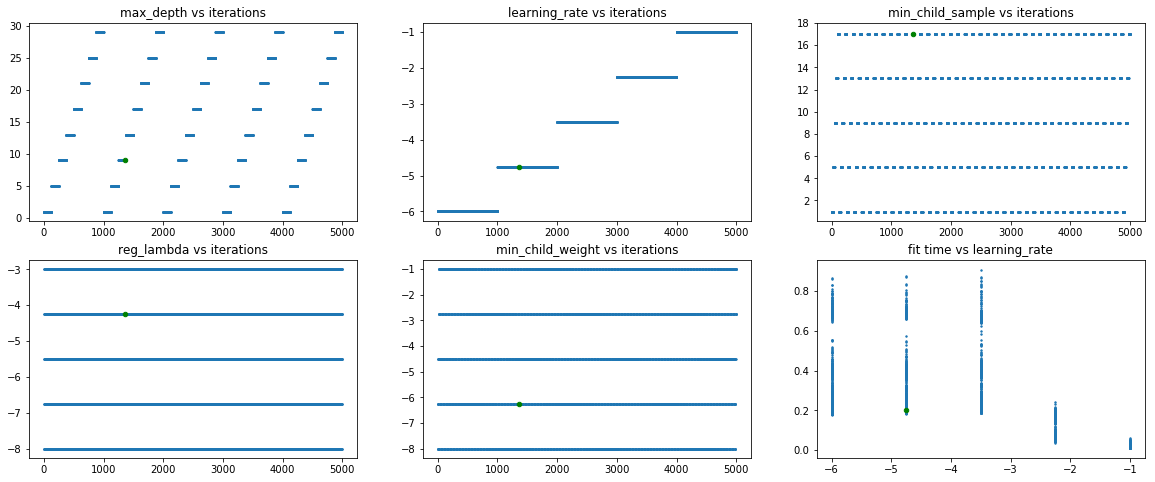

In [34]:
s=2
idx = 1358
f, ax = plt.subplots(2, 3, figsize=(20,8))
ax = ax.reshape(-1)
ax[0].scatter(np.arange(len(results_df)), results_df['param_max_depth'], s=s)
ax[0].scatter(np.arange(len(results_df))[idx], results_df['param_max_depth'][idx], s=20, c='g')
ax[0].set_title('max_depth vs iterations')
ax[1].scatter(np.arange(len(results_df)), np.log10(np.array(results_df['param_learning_rate'].values, dtype='float')), s=s)
ax[1].scatter(np.arange(len(results_df))[idx], np.log10(np.array(results_df['param_learning_rate'].values, dtype='float'))[idx], s=20, c='g')
ax[1].set_title('learning_rate vs iterations')
ax[2].scatter(np.arange(len(results_df)), results_df['param_min_child_samples'].values,s=s)
ax[2].scatter(np.arange(len(results_df))[idx], results_df['param_min_child_samples'].values[idx],s=20, c='g')
ax[2].set_title('min_child_sample vs iterations')
ax[3].scatter(np.arange(len(results_df)), np.log10(np.array(results_df['param_reg_lambda'].values, dtype='float')),s=s)
ax[3].scatter(np.arange(len(results_df))[idx], np.log10(np.array(results_df['param_reg_lambda'].values, dtype='float'))[idx],s=20,  c='g')
ax[3].set_title('reg_lambda vs iterations')
ax[4].scatter(np.arange(len(results_df)), np.log10(np.array(results_df['param_min_child_weight'].values, dtype='float')), s=s)
ax[4].scatter(np.arange(len(results_df))[idx], np.log10(np.array(results_df['param_min_child_weight'].values, dtype='float'))[idx], s=20, c='g')
ax[4].set_title('min_child_weight vs iterations')
ax[5].scatter(np.log10(np.array(results_df['param_learning_rate'].values, dtype='float')), results_df['mean_fit_time'].values,  s=s)
ax[5].scatter(np.log10(np.array(results_df['param_learning_rate'].values, dtype='float'))[idx], results_df['mean_fit_time'].values[idx],  s=20, c='g')
ax[5].set_title('fit time vs learning_rate')
print(idx)

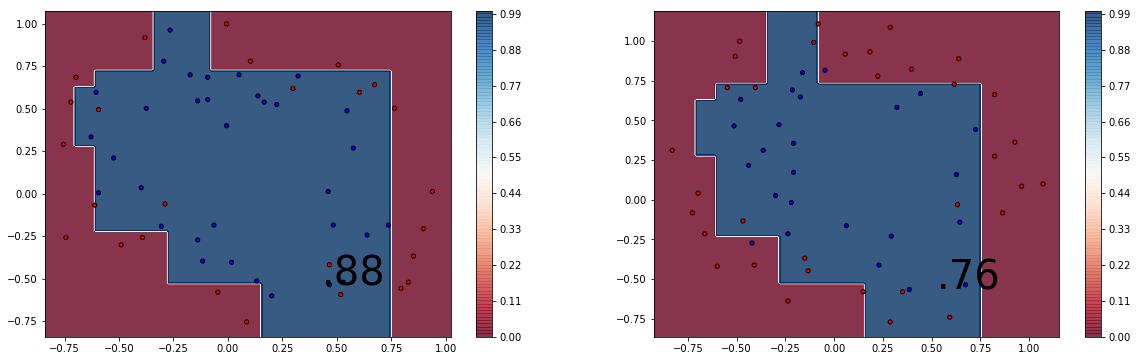

In [51]:
score_train = model.score(X_train, y_train)
score_test = model.score(X_val, y_val)
# Graficamos probabilidades en el plano de la combinación de todos los clasificadores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, score_train, model.predict,  mesh_res=200, ax=ax1, bound_line=False)
RHelper.plot_boundaries(X_val, y_val, score_test, model.predict,  mesh_res=200, ax=ax2, bound_line=False)